# Customer Segmentation


## Content

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

## Context
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. 

You are required to help the manager to predict the right group of the new customers.



## Data description

1. **ID**: Unique ID
2. **Gender**: Gender of the customer
3. **Ever_Married**: Marital status of the customer
4. **Age**: Age of the customer
5. **Graduated**: Is the customer graduated?
6. **Profession**: Profession of the customer
7. **Work_Experience**: Work Experience in years
8. **Spending**: Profession of the customer
9. **Work_Experience**: Work Experience in years
10. **Spending_Score**: Spending score of the customer
11. **Family_Size**: Number of family members for the customer(including the customer
12. **Var_1**: Anonymised Category for the customer
13. **Segmentation (target)**: Customer Segment of the customer

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import dython as dh

sns.set(style="ticks")

%matplotlib inline

**Loading dataset**

In [2]:
df=pd.read_csv('customer_segmentation.csv')

## Exploratory Data Analysis

In [3]:
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1278,464084,Male,No,25,No,Healthcare,1.0,Low,5.0,Cat_4,D
1224,465078,Male,Yes,43,Yes,Executive,0.0,High,4.0,Cat_6,B
5263,461445,Male,Yes,52,Yes,Artist,3.0,Average,4.0,Cat_6,C
5358,460288,Male,Yes,61,Yes,Healthcare,1.0,Average,7.0,Cat_3,B
1806,464849,Male,Yes,40,Yes,Artist,0.0,Average,4.0,Cat_4,C


In [4]:
df.describe( include = ['O'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.shape

(8068, 11)

In [8]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

**Values seem to be valid, but we have to fill missing values first. Let's plot the categories with missing values**

<ipython-input-9-630c20c4ed98>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


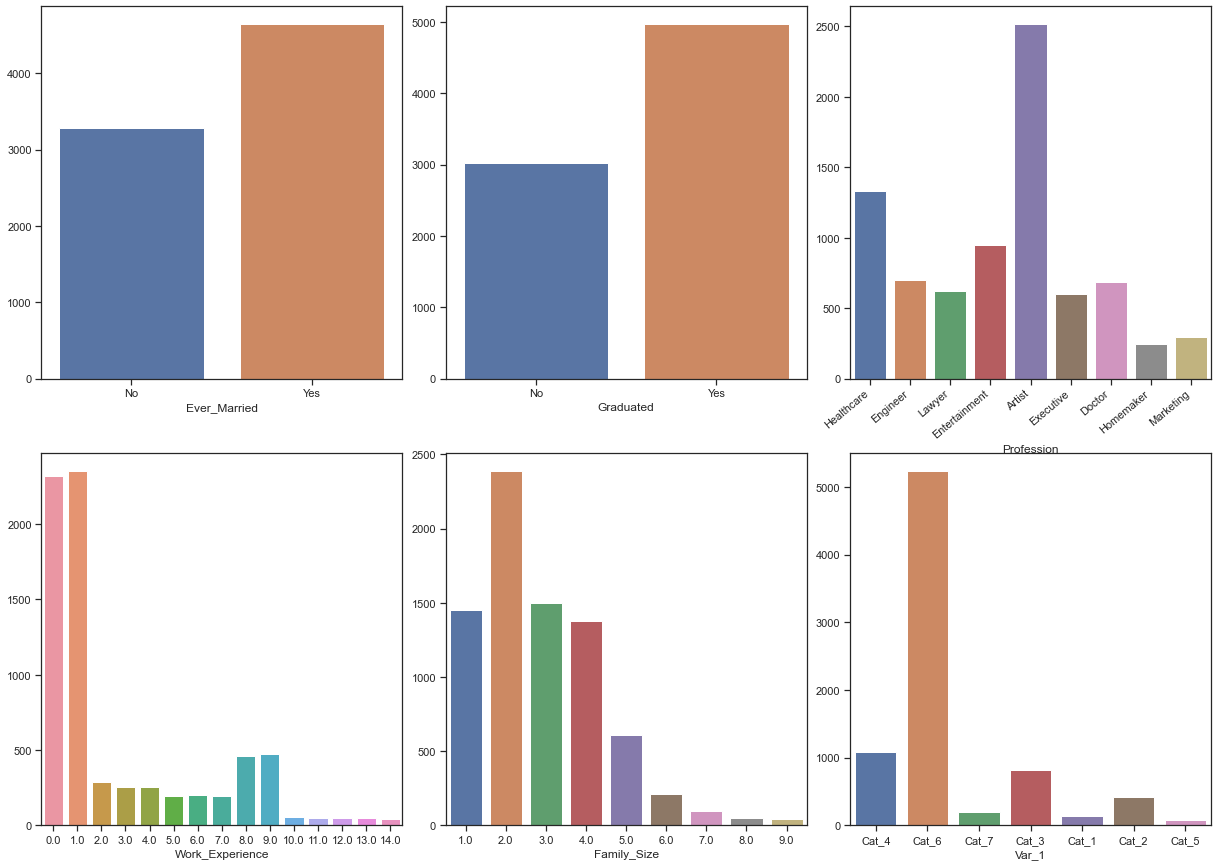

In [9]:
fig, ax =plt.subplots(2,3,figsize=(17,12))
fig.tight_layout()
ax=ax.flatten()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
fig.subplots_adjust(hspace=0.2)

for i in range(6):
    sns.countplot(data=df,x=df.columns[df.isnull().any()][i], ax=ax[i])
    ax[i].set_ylabel('')    


**Let's delete rows with 3 or more missing values**

In [10]:
df = df.dropna(thresh=3)

**Let's check for invalid rows**

In [11]:
# We consider that people can start working when they are over 15, so 25 years old people can't have more than 10 years of experience

In [12]:
df[(df['Age']<25) & (df['Work_Experience']>10)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
176,464866,Female,No,23,No,Engineer,11.0,Low,1.0,Cat_3,D
2388,460642,Male,No,19,No,Healthcare,13.0,Low,3.0,Cat_3,D
2722,467570,Male,No,18,No,Healthcare,14.0,Low,NaN,Cat_6,D
3018,466600,Male,No,18,No,Healthcare,11.0,Low,1.0,Cat_4,D
3765,465836,Male,No,19,No,Executive,13.0,Low,3.0,Cat_7,D
4784,459370,Male,No,18,No,Healthcare,13.0,Low,4.0,Cat_6,D
6039,463466,Male,No,21,No,Healthcare,13.0,Low,6.0,Cat_6,D
6780,460650,Female,NaN,20,No,Homemaker,13.0,Low,1.0,Cat_4,D
7586,459367,Female,No,22,No,Doctor,11.0,Low,4.0,Cat_1,D
7808,460486,Female,No,18,No,Healthcare,12.0,Low,3.0,Cat_3,D


In [13]:
df.drop(df[(df['Age']<25) & (df['Work_Experience']>10)].index,inplace=True)

**Now let's fill missing values for each category, accordingly**

In [14]:
df['Ever_Married'].ffill(inplace=True)
df['Graduated'].ffill(inplace=True)
df['Profession'].ffill(inplace=True)
df['Var_1'].ffill(inplace=True)
df['Work_Experience'].fillna(df['Work_Experience'].mean(),inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(),inplace=True)

**Let's check missing values again**

In [15]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

**Let's convert floats to ints, since they are all round numbers**

In [16]:
df['Work_Experience']=df['Work_Experience'].astype('int64')
df['Family_Size']=df['Family_Size'].astype('int64')

In [17]:
df_model = df.copy()  #Let's make a copy of the df as a  model to use later on

### **Now let's try to divide age, work experience and family size into different categories**

In [18]:
df['Age_Group']=pd.cut(df.Age,bins=[18,35,60,90],labels=['Young Adult','Middle-Aged','Elderly'])
df['Work_Exp_Group'] = pd.cut(df.Work_Experience,bins=[0,1,7,15],labels=['Low-Exp','Med-Exp','High-Exp'])
df['Family_Size_Group'] = pd.cut(df.Family_Size,bins=[0,4,7,10],labels=['Small Family','Large Family','Joint Family'])
df.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,Work_Exp_Group,Family_Size_Group
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D,Young Adult,Low-Exp,Small Family


**Now let's try to find correlations in the numerical values**

<AxesSubplot:>

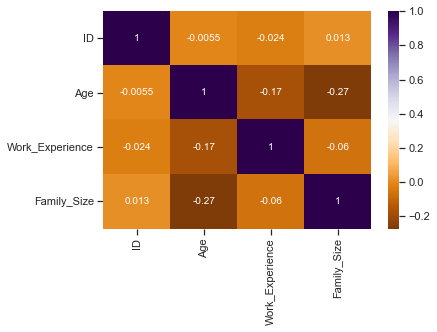

In [19]:
sns.heatmap(df.corr(),annot=True, cmap='PuOr')


**Now let's try to find ASSOCIATIONS between categorical variables using function from Dython's library (Chi-Square Test implementation)**

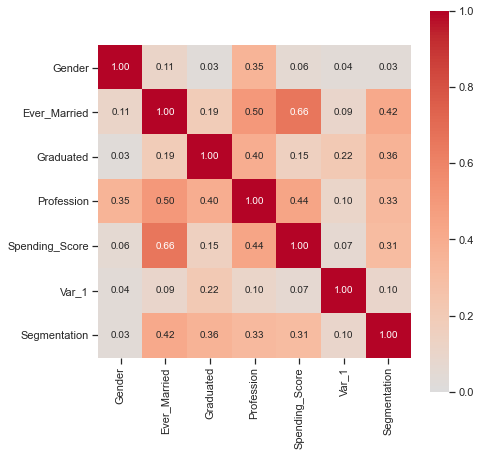

In [20]:
dh.nominal.associations(df.select_dtypes('O').copy(),plot=True,cmap='coolwarm',figsize=(7,7));

<AxesSubplot:xlabel='Spending_Score'>

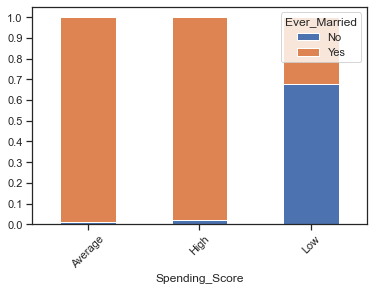

In [21]:

ax2 = df.pivot_table(columns='Ever_Married',index='Spending_Score',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)),rot=45)

**As we can notice, people who never married have low Spending Score only, where those who did tend to have average and high score.**

<AxesSubplot:xlabel='Profession'>

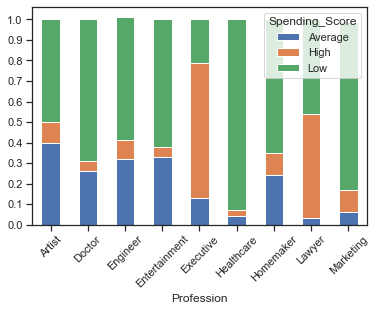

In [22]:

ax2 = df.pivot_table(columns='Spending_Score',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)),rot=45)


**As we can notice, Marketing and Entertainment have the lowest spending scores, whereas Executives and Lawyes have the highest scores**

<AxesSubplot:xlabel='Spending_Score'>

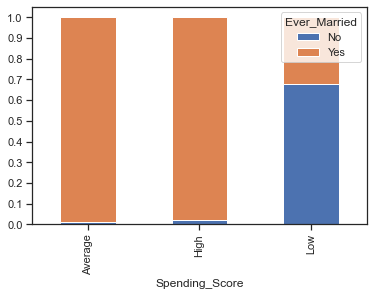

In [23]:
ax2 = df.pivot_table(columns='Ever_Married',index='Spending_Score',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)))

**Now let's try to visualize the segmentation category and their relationship with the rest of the variables**

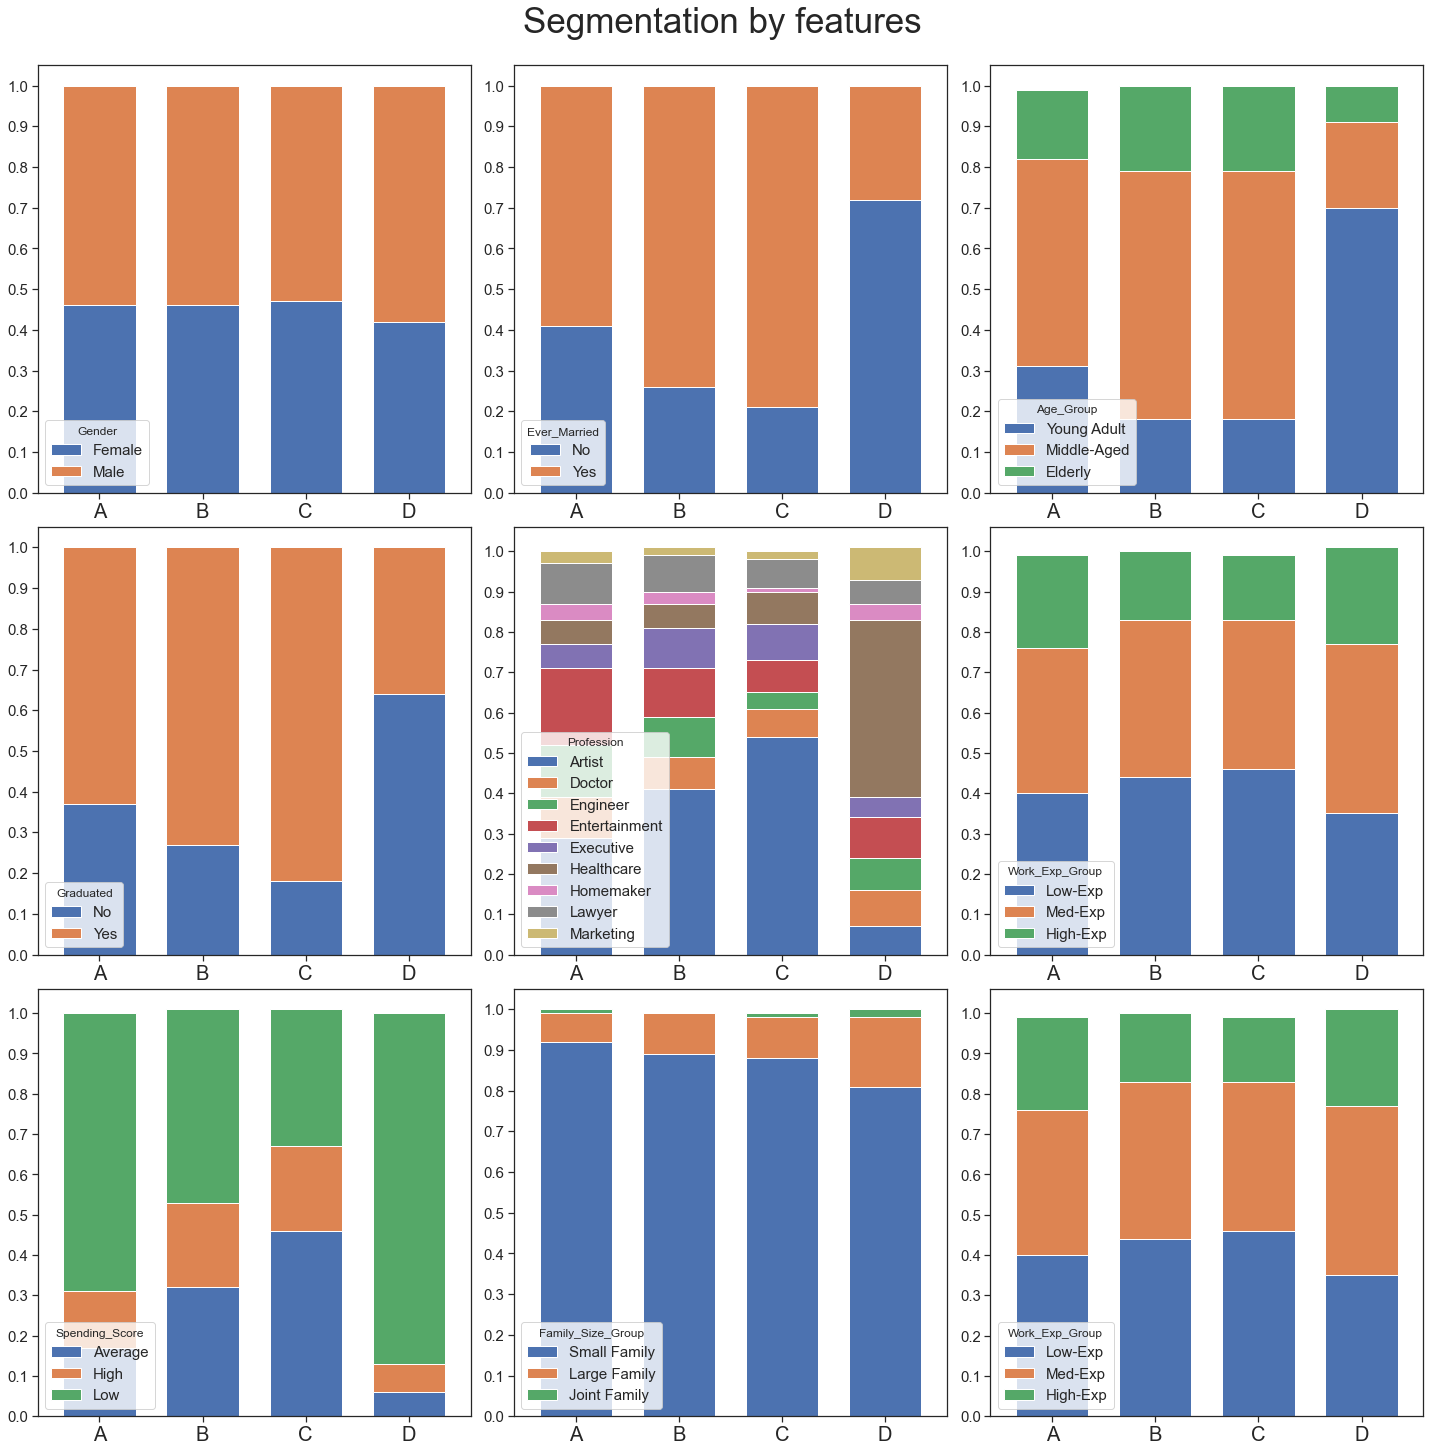

In [24]:
fig, ax =plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Gender','Ever_Married','Age_Group','Graduated','Profession','Work_Exp_Group','Spending_Score','Family_Size_Group','Work_Exp_Group','Var_1']
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
fig.suptitle("Segmentation by features",fontsize=35,y=1)
fig.tight_layout()



for i in range(9):
    ax2 = df.pivot_table(columns=cols[i],index='Segmentation',values='ID',aggfunc='count')
    ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
    ax2.plot(kind="bar",ax = ax[i],stacked=True,width=0.7,yticks=list(np.arange(0,1.1,0.1).round(2)))
    #ax[i].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    #ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].tick_params(labelsize=6)
    ax[i].legend(loc='lower left', fontsize=15,title=cols[i])
    plt.setp(ax[i].get_xticklabels(), rotation='horizontal', fontsize=20)
    plt.setp(ax[i].get_yticklabels(), rotation='horizontal', fontsize=15)



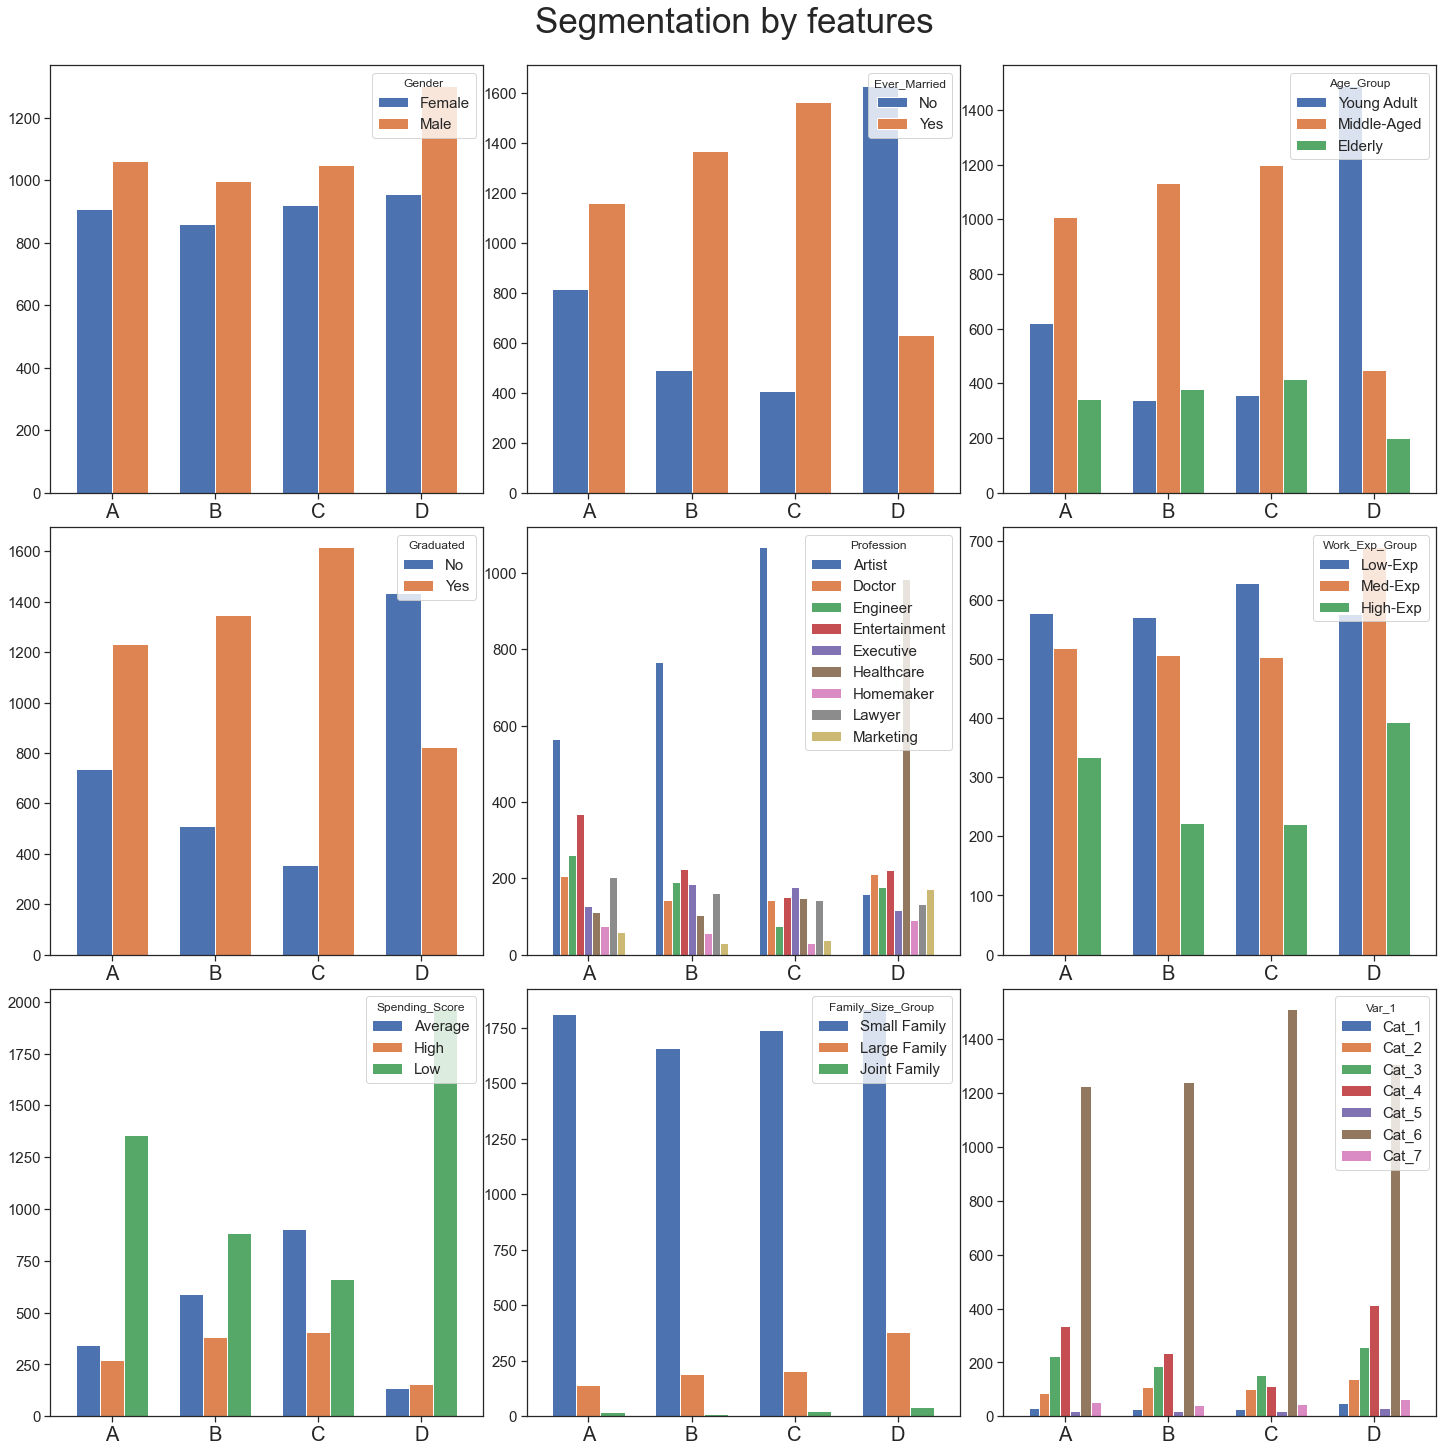

In [25]:
fig, ax =plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Gender','Ever_Married','Age_Group','Graduated','Profession','Work_Exp_Group','Spending_Score','Family_Size_Group','Var_1']
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.05)
fig.suptitle("Segmentation by features",fontsize=35,y=1)
fig.tight_layout()



for i in range(9):
    ax1 = df.groupby(["Segmentation"])[cols[i]].value_counts().unstack().round(3)
    ax1.plot(kind="bar",ax = ax[i],width=0.7)
    #ax[i].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    #ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].tick_params(labelsize=6)
    ax[i].legend(loc='upper right', fontsize=15,title=cols[i])
    plt.setp(ax[i].get_xticklabels(), rotation='horizontal', fontsize=20)
    plt.setp(ax[i].get_yticklabels(), rotation='horizontal', fontsize=15)


# Summary

**Gender**

* Segments are almost equally distributed between both genders, with segment D having a higher percentage of males compared to other genders

**Ever_Married**
* Most customers on segments 'A', 'B' and 'C' have married, except for category 'D' which has more singles than married. We could imply that younger adults haven't married yet.

**Age_Group**

* Young adults leader 'D' group, whereas middle-aged people do in the rest of the categories

**Graduated**

* Segment C contains most graduated professionals, whereas category 'D' has more non-graduates.

**Profession**

* Segment 'D' has more Healthcare workers, whereas the rest of the segments has more Artist.

**Work_Experience**

* Customers from segment 'A' and 'D' have higher work experience compared to rest, whereas segment 'C' has the lowest work experience.

**Spending Score**

* Segment 'D' has the lowest spending score, whereas segment 'C' slightly surpasses segment 'B'

**Family_Size**

* Segment 'D' has the highest family size, but most segments have small families (<4)

**Var_1**

* In most segments, 'Cat_6' proportion is higher, followed by 'Cat_4'






## Data Preprocessing

In [26]:
def encode_dict(values):
    return {val:i for i,val in enumerate(values)}

In [27]:
gender_dict = encode_dict(df_model.Gender.unique())
ever_married_dict = encode_dict(df_model.Ever_Married.unique())
gra_dict = encode_dict(df_model.Graduated.unique())
profession_dict = encode_dict(df_model.Profession.unique())
spend_dict = encode_dict(df_model.Spending_Score.unique())
cat_dict = encode_dict(df_model.Var_1.unique())
segment_dict = encode_dict(df_model.Segmentation.unique())

In [28]:
encoded_dict = {
    'Gender': gender_dict,
    'Ever_Married': ever_married_dict,
    'Graduated': gra_dict,
    'Profession': profession_dict,
    'Spending_Score': spend_dict,
    'Var_1': cat_dict,
    'Segmentation': segment_dict
}

In [29]:
df_model.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [30]:
df_model = df_model.replace(encoded_dict)

In [31]:
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,0,1,0,4,0,0
1,462643,1,1,38,1,1,2,1,3,0,1
2,466315,1,1,67,1,1,1,0,1,1,2
3,461735,0,1,67,1,2,0,2,2,1,2
4,462669,1,1,40,1,3,2,2,6,1,1


## Modelling

In [32]:
X=df_model.drop(['ID','Segmentation'],axis=1)
y=df_model['Segmentation']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc = GradientBoostingClassifier(learning_rate=1, 

n_estimators=300,max_depth=3, min_samples_split=2, min_samples_leaf=1, 

subsample=1,max_features='sqrt', random_state=10)

In [37]:
gbc.fit(X,y)

GradientBoostingClassifier(learning_rate=1, max_features='sqrt',
                           n_estimators=300, random_state=10, subsample=1)

In [38]:
predictions=gbc.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[384  42  17  15]
 [ 40 261  46  39]
 [ 28  53 208  74]
 [ 35  42  48 280]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       458
           1       0.66      0.68      0.67       386
           2       0.65      0.57      0.61       363
           3       0.69      0.69      0.69       405

    accuracy                           0.70      1612
   macro avg       0.70      0.69      0.69      1612
weighted avg       0.70      0.70      0.70      1612

